In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score,precision_score,plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('_BANKRUPTCY_PREDICTION.csv')
df=pd.DataFrame(data)
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [3]:
df.shape

(6819, 95)

In [4]:
# df.info()

In [5]:
df.duplicated().sum()

0

In [6]:
print("Descriptive Statistics")
df.describe()

Descriptive Statistics


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Bankrupt'>

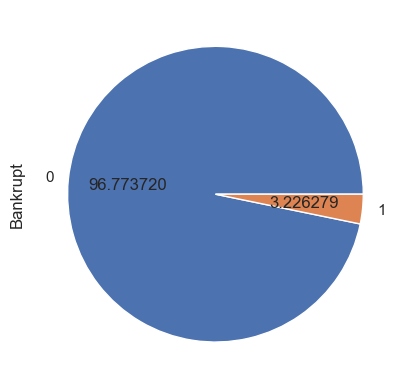

In [7]:
df['Bankrupt'].value_counts().plot.pie(autopct="%2f")

In [8]:
target= "Bankrupt"
x=df.drop(columns=target)
y=df[target]

In [9]:
features = data.columns[:-1] #from now on "features" are interchangable with "columns"
features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [10]:
X_0 = x.loc[y==0,:] #not bankrupted
X_1 = x.loc[y==1,:] #bakrupted

X_0_test = X_0.sample(n=220)

# significant_cols = [] # features that have "very Different" means
# difs = []

# for col in x.columns:
#     relative_means_difference = (X_1[col].mean() - X_0_test[col].mean()) / X_0_test[col].mean() 
#     difs.append([col,relative_means_difference])
#     if abs(relative_means_difference)>0.5: #thresold, at least 50% greater/smaller mean 
#         significant_cols.append(col)


# sns.barplot(x=list(range(len(difs))),y=[e[1] for e in difs])
# plt.ylim((-1,5)) #this controls the size of the window displayed
# plt.xlabel("Features")
# plt.ylabel("Relative difference between means")
# plt.show()

In [11]:
#MONTE CARLO HYPOTESIS TEST

from statistics import mean

sampling_distribution = {feature: [] for feature in features} #SAMPLING DISTRIBUTION OF SAMPLE MEANS for each feature
bankrupt_means = {feature: X_1[feature].mean() for feature in features} #MEAN of each feature (observed data = bankrupt companies)

for i in range(1000): #sampling from the data 1000 times
    X_sample = x.sample(n=220) #n same as the number of bankrupt companies,sampling from X
    for feature in features:
        s_mean = X_sample[feature].mean()
        sampling_distribution[feature].append(s_mean)

pvalues = {feature: None for feature in features}

def get_p_value(sampling_distribution, observed):
    l = abs(observed-mean(sampling_distribution)) #distance of observed from the sample mean
    return sum(abs(sample_mean-mean(sampling_distribution))>l for sample_mean in sampling_distribution)/len(sampling_distribution) #the proportion of data more extreme than observed
               
for feature in pvalues: #filling the pvalues dictionary
    pvalues[feature] = get_p_value(sampling_distribution[feature],bankrupt_means[feature]) 

In [12]:
# print("Number of significantly different features: %d" %sum(np.array(list(pvalues.values()))>0.05))
# print(dict(pvalues.items())) #look at the first 10 features and associated p-values

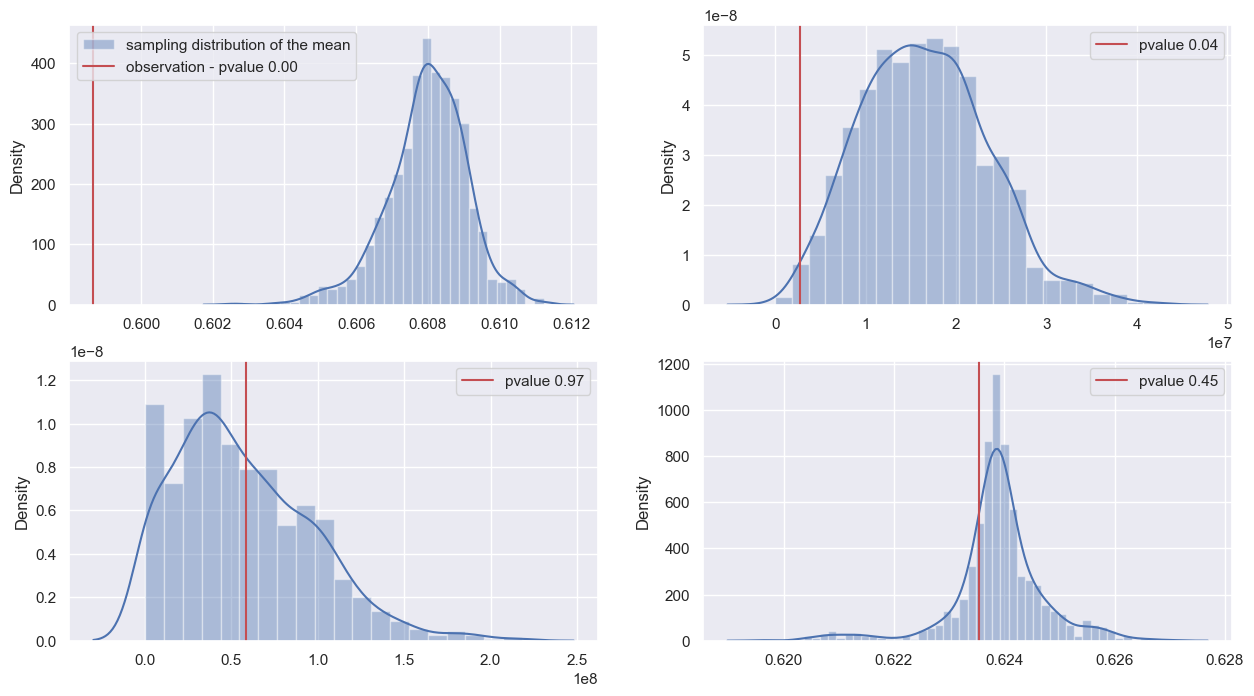

In [13]:
#Plotting some features and their distribution of sample means + red line with the mean of the observed data (= data of bankrupt companies)

fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.distplot(sampling_distribution[" Operating Gross Margin"], ax=axes[0,0],label="sampling distribution of the mean")
axes[0,0].axvline(x=bankrupt_means[" Operating Gross Margin"],label="observation - pvalue %.2f"%pvalues[" Operating Gross Margin"],c="r")
axes[0,0].legend(loc='upper left')

sns.distplot(sampling_distribution[" Interest-bearing debt interest rate"], ax=axes[0,1])
axes[0,1].axvline(x=bankrupt_means[" Interest-bearing debt interest rate"],label="pvalue %.2f"%pvalues[" Interest-bearing debt interest rate"],c="r")
axes[0,1].legend()

sns.distplot(sampling_distribution[" Inventory/Current Liability"], ax=axes[1,0])
axes[1,0].axvline(x=bankrupt_means[" Inventory/Current Liability"],label="pvalue %.2f"%pvalues[" Inventory/Current Liability"],c="r")
axes[1,0].legend()

sns.distplot(sampling_distribution[" No-credit Interval"], ax=axes[1,1])
axes[1,1].axvline(x=bankrupt_means[" No-credit Interval"],label="pvalue %.2f"%pvalues[" No-credit Interval"],c="r")
axes[1,1].legend()

plt.legend()
plt.show()

In [14]:
# I only exaimined the variables independently while there are probably many dependencies between them so I am not going to draw conclusions or perform feature selection based on these p-values

In [15]:
#MULTICOLLINEARITY (CORRELATION BETWEEN PREDICTOR VARIABLES)
# find features with correlation coefficient greater than 0.9 and drop them.

cor_matrix = df.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

In [16]:
#Dropping correlated data

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #upper triangle of the correlation matrix

dropped_cols = set()
for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.9): #more than 0.9 corr. coeficient -> dropped
        dropped_cols.add(feature)

print("There are %d dropped columns" %len(dropped_cols))

x = x.drop(dropped_cols,axis=1)
x.head()

There are 19 dropped columns


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361300e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078890e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490


In [17]:
# PCA is a way to decorrelate and reduce the dimensionality of the data through the
# change of the basis. I am going to try if the method helps to decorrelate the data.

scaler = StandardScaler() 
X_for_pca = pd.DataFrame(data=scaler.fit_transform(x),index=x.index,columns=x.columns) #standardized dataset

n_components = 10

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_for_pca)
X_pc = pd.DataFrame(data=principal_components, columns=['PC %d'%d for d in range(n_components)])

print("Explained variance by 10 components %.2f" %sum(pca.explained_variance_ratio_))

Explained variance by 10 components 0.42


In [18]:
# As per the above result, with 10 principal component the explained variance is 
# still very low, so i do not find the pca transformation useful for this data.

# 5- Data Imbalance
There is a huge imbalance between the data (only 3.2% companies from the dataset bankrupted). Before training a model I need to deal with this problem, otherwise the model would just predict every company to not bankrupt.

I decided to try two ways:

1- Introducing weights \ Every datapoint from the minority class is considered "more important" than from the majority class, the weights for the two classes are inversely proportional to the number of datapoints in that class. Implemented within the SVM in next section.

2- SMOTE \ The Synthetic Minority Over-sampling TEchnique. \ Creates new synthetic datapoints using the k-nearest neighbor algorithm. \ With this method I am going to obtain the dataset where the value counts for both categories are the same.

In [19]:
#Data Imbalance
# SMOTE

sm = SMOTE(random_state=42)

X_sm, Y_sm = sm.fit_resample(x,y)

print('New Balance of 1 and 0 Classes (%):')
Y_sm.value_counts()

New Balance of 1 and 0 Classes (%):


1    6599
0    6599
Name: Bankrupt, dtype: int64

In [20]:
# create list contain [accuracy, F1-measure, Recall ,precision]
mod = []
accuracy = []

recall = []
precision = []
f1_measure = []

In [21]:
x_train, x_test, y_train,y_test = train_test_split(X_sm, Y_sm,test_size=0.2, stratify=Y_sm)
#stratify address the unbalance only in the train test splitting

In [22]:
# Select 30 features
X_train_10 = x_train.iloc[:,:10]
X_test_10 = x_test.iloc[:,:10]

# Select 50 features
X_train_50 = x_train.iloc[:,:50]
X_test_50 = x_test.iloc[:,:50]

# Select 100 features
X_train_70 = x_train.iloc[:,:70]
X_test_70 = x_test.iloc[:,:70]

# 1 SVM

am going to train a SVM model. First with SMOTE-dataset, then without SMOTE data and lastly with SMOTE-dataset but reduced to 10% of the data.

The function train_test_SVM(X,y) has multiple steps:

1- Splitting the data
2- Assigning the weights
3- Creating a Pipeline
4- Using GridSearchCV to find the optimal hyperparameters \ Train the model
5- Score
6- Confusion matrix

The SVM training takes quite long (around 4 minutes for me).

big amount of datapoints (perhaps too many for a SVM)
GridSearchCV using cross validation for different (C, gamma) combinations
training 'rbf' kernel is slower than linear kernel

In [23]:
# svm
def train_test_SVM(x,x_test_):
    """Function finds the optimal hyperparameters of the SVM, plots the confusion 
    matrix of test data, returns the model"""
    sw_train = class_weight.compute_sample_weight(class_weight = 'balanced', y = y_train) #when balanced sw_train = [1.1.1...1]
    
    steps = [('scaler', StandardScaler()), ('SVM', SVC(cache_size=7000))]
    pipeline = Pipeline(steps)
    
    #parameters' names must match the 'SVM' name in Pipeline followed by two underscores!
    #standard SVM hyperparameters
    param_grid = {
    'SVM__C':[0.01,0.1,1,10],
    'SVM__gamma':[0.1,0.01,0.001,0.0001],
    'SVM__kernel':['rbf']
    }
    
    f1 = make_scorer(f1_score , average='macro')
    grid = GridSearchCV(pipeline,param_grid=param_grid, cv=5, scoring=f1, verbose=0) #verbose controls the training progression display!
    grid.fit(x, y_train, SVM__sample_weight = sw_train)
    
    print("best parameters: ")
    print(grid.best_params_)
    
    model = grid.best_estimator_
    y_pred = model.predict(x_test_)
    
    print("f1 score is %.2f "%f1_score(y_test, y_pred))
    print("Precision: %.2f" %precision_score(y_test, y_pred))
    print("recall: %.2f" %recall_score(y_test, y_pred))
    print("Precision: %.2f" %precision_score(y_test, y_pred))
    acc2 = accuracy_score(y_test, y_pred)
    print("Accuracy score for SVM Model: {:.2f} %".format(acc2*100))
    plot_confusion_matrix(model,
                         x_test_,
                         y_test,
                         values_format='d')
    mod.append('SVM')
    accuracy.append(acc2)
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    return model

best parameters: 
{'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
f1 score is 0.89 
Precision: 0.84
recall: 0.94
Precision: 0.84
Accuracy score for SVM Model: 88.11 %


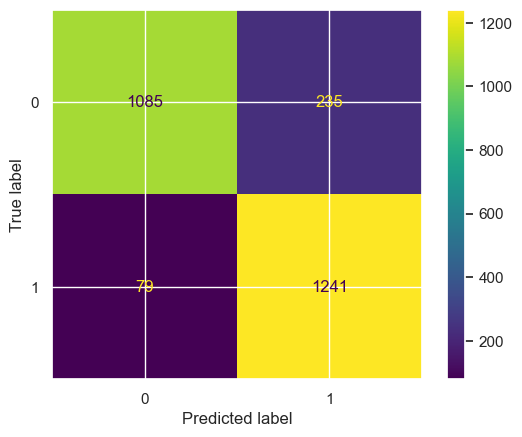

In [24]:
#Training and testing with SMOTE

model = train_test_SVM(X_train_10,X_test_10)

best parameters: 
{'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
f1 score is 0.99 
Precision: 0.97
recall: 1.00
Precision: 0.97
Accuracy score for SVM Model: 98.56 %


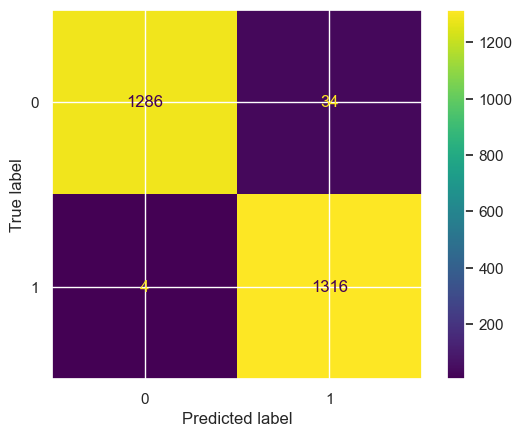

In [25]:
model = train_test_SVM(X_train_50,X_test_50)

best parameters: 
{'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
f1 score is 0.99 
Precision: 0.98
recall: 0.99
Precision: 0.98
Accuracy score for SVM Model: 98.83 %


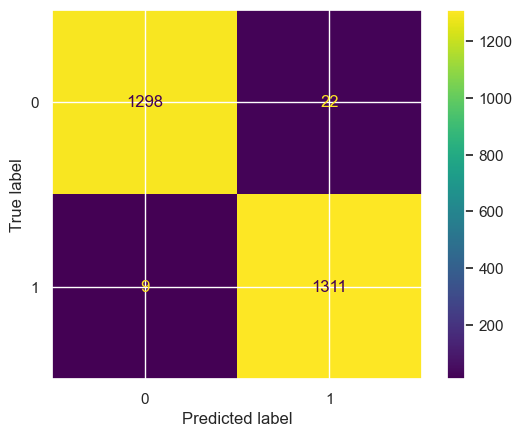

In [26]:
model = train_test_SVM(X_train_70,X_test_70)

# Now go for Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

In [28]:
def train_test_LogisticRegression(x_train,x_test_):
    """Function finds the optimal hyperparameters of the logistic regression, plots the confusion matrix of test data, returns the model"""
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y) #stratify addresses the unbalance only in the train test splitting
    
    sw_train = compute_sample_weight(class_weight = 'balanced', y = y_train) #when balanced sw_train = [1.1.1...1]
    
    steps = [('scaler', StandardScaler()), ('LogisticRegression', LogisticRegression(solver='lbfgs', max_iter=10000))]
    pipeline = Pipeline(steps)
    
    #parameters' names must match the 'LogisticRegression' name in Pipeline followed by two underscores!
    #standard logistic regression hyperparameters
    param_grid = {
        'LogisticRegression__C': [0.01, 0.1, 1, 10],
        'LogisticRegression__penalty': ['l1', 'l2'],
        'LogisticRegression__class_weight': ['balanced', None]
    }
    
    f1 = make_scorer(f1_score , average='macro')
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=f1, verbose=0) #verbose controls the training progression display!
    grid.fit(x_train, y_train, LogisticRegression__sample_weight=sw_train)
    
    print("best parameters: ")
    print(grid.best_params_)
    
    model = grid.best_estimator_
    y_pred = model.predict(x_test_)
    
    print("f1 score is %.2f "%f1_score(y_test, y_pred))
    print("Precision: %.2f" %precision_score(y_test, y_pred))
    print("recall: %.2f" %recall_score(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for Logistic Regression Model: {:.2f} %".format(acc*100))
    plot_confusion_matrix(model,
                         x_test_,
                         y_test,
                         values_format='d')
    mod.append('LR')
    accuracy.append(acc)
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    return model

best parameters: 
{'LogisticRegression__C': 10, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__penalty': 'l2'}
f1 score is 0.83 
Precision: 0.82
recall: 0.84
Accuracy score for Logistic Regression Model: 82.73 %


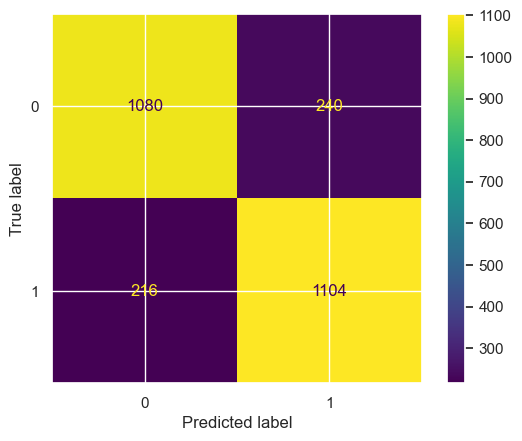

In [29]:
#Training and testing with SMOTE

model = train_test_LogisticRegression(X_train_10,X_test_10)

best parameters: 
{'LogisticRegression__C': 1, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__penalty': 'l2'}
f1 score is 0.90 
Precision: 0.88
recall: 0.91
Accuracy score for Logistic Regression Model: 89.51 %


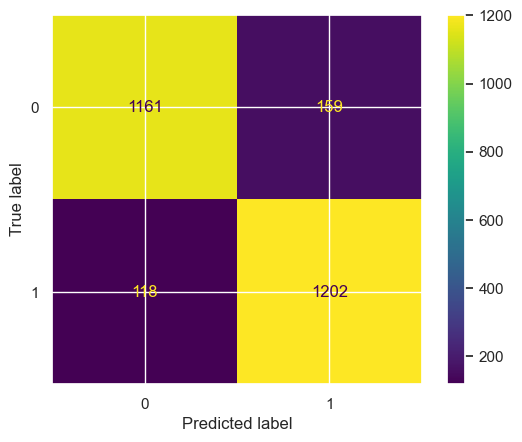

In [30]:
model = train_test_LogisticRegression(X_train_50,X_test_50)

best parameters: 
{'LogisticRegression__C': 10, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__penalty': 'l2'}
f1 score is 0.90 
Precision: 0.89
recall: 0.91
Accuracy score for Logistic Regression Model: 90.00 %


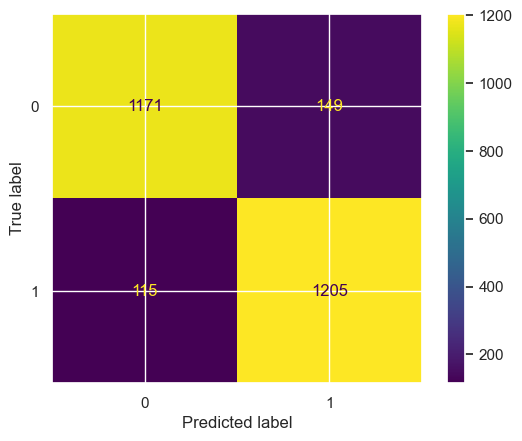

In [31]:
model = train_test_LogisticRegression(X_train_70,X_test_70)

# Now go with Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def train_test_RandomForest(x, x_test_):
    """Function finds the optimal hyperparameters of the Random Forest Classifier, plots the confusion matrix of test data, and returns the model"""
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    sw_train = compute_sample_weight(class_weight='balanced', y=y_train)
    
    steps = [('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier())]
    pipeline = Pipeline(steps)
    
    # Random Forest Classifier hyperparameters
    param_grid = {
        'RandomForest__n_estimators': [10, 20, 30],
        'RandomForest__max_depth': [None, 10, 20],
        'RandomForest__min_samples_split': [2, 5],
        'RandomForest__class_weight': ['balanced', None]
    }
    
    f1 = make_scorer(f1_score, average='macro')
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=f1, verbose=0)
    grid.fit(x, y_train, RandomForest__sample_weight=sw_train)
    
    print("best parameters: ")
    print(grid.best_params_)
    
    model = grid.best_estimator_
    y_pred = model.predict(x_test_)
    
    print("f1 score is %.2f" % f1_score(y_test, y_pred))
    print("Precision: %.2f" % precision_score(y_test, y_pred))
    print("Recall: %.2f" % recall_score(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for Random Forest Model: {:.2f} %".format(acc*100))
    plot_confusion_matrix(model, x_test_, y_test, values_format='d')
    mod.append('RF')
    accuracy.append(acc)
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    return model

best parameters: 
{'RandomForest__class_weight': 'balanced', 'RandomForest__max_depth': 20, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 30}
f1 score is 0.95
Precision: 0.93
Recall: 0.98
Accuracy score for Random Forest Model: 95.23 %


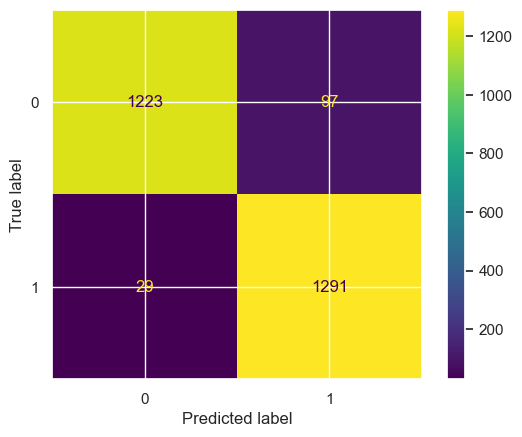

In [33]:
#Training and testing with SMOTE

model = train_test_RandomForest(X_train_10,X_test_10)

best parameters: 
{'RandomForest__class_weight': 'balanced', 'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 30}
f1 score is 0.97
Precision: 0.96
Recall: 0.99
Accuracy score for Random Forest Model: 97.35 %


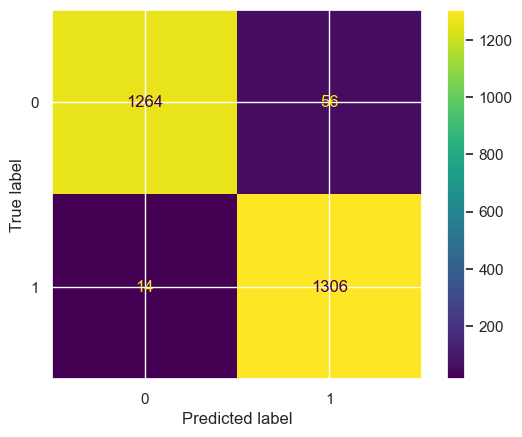

In [34]:
#Training and testing with SMOTE

model = train_test_RandomForest(X_train_50,X_test_50)

best parameters: 
{'RandomForest__class_weight': 'balanced', 'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 20}
f1 score is 0.98
Precision: 0.96
Recall: 1.00
Accuracy score for Random Forest Model: 97.69 %


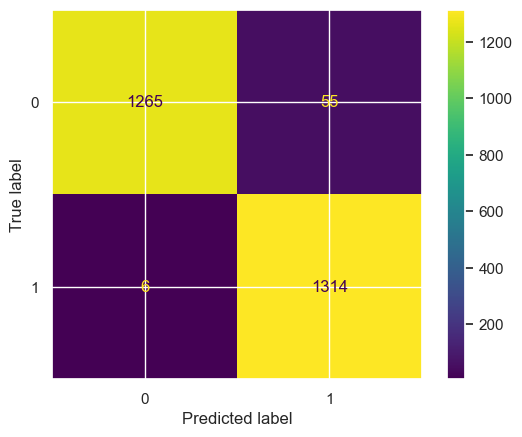

In [35]:
#Training and testing with SMOTE

model = train_test_RandomForest(X_train_70,X_test_70)

# Now go with Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, plot_confusion_matrix

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [38]:
def train_test_NaiveBayes(x, x_test_):
    """Function finds the optimal hyperparameters of the Naive Bayes classifier, plots the confusion matrix of test data, and returns the model"""
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) #stratify addresses the unbalance only in the train test splitting

    sw_train = compute_sample_weight(class_weight='balanced', y=y_train) #when balanced sw_train = [1.1.1...1]

    steps = [('scaler', StandardScaler()), ('NaiveBayes', GaussianNB())]
    pipeline = Pipeline(steps)
    grid_param = {'NaiveBayes__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

    # No hyperparameters to optimize for Naive Bayes

    f1 = make_scorer(f1_score , average='macro')
    grid = GridSearchCV(pipeline, param_grid=grid_param, cv=5, scoring=f1, verbose=0) #verbose controls the training progression display!
    grid.fit(x, y_train, NaiveBayes__sample_weight=sw_train)

    print("best parameters: ")
    print(grid.best_params_)

    model = grid.best_estimator_
    y_pred = model.predict(x_test_)

    print("f1 score is %.2f "%f1_score(y_test, y_pred))
    print("Precision: %.2f" %precision_score(y_test, y_pred))
    print("Recall: %.2f" %recall_score(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for Naive Bayes Model: {:.2f} %".format(acc*100))
    plot_confusion_matrix(model, x_test_, y_test, values_format='d')
    mod.append('NB')
    accuracy.append(acc)
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    return model

best parameters: 
{'NaiveBayes__var_smoothing': 1e-09}
f1 score is 0.72 
Precision: 0.58
Recall: 0.94
Accuracy score for Naive Bayes Model: 62.61 %


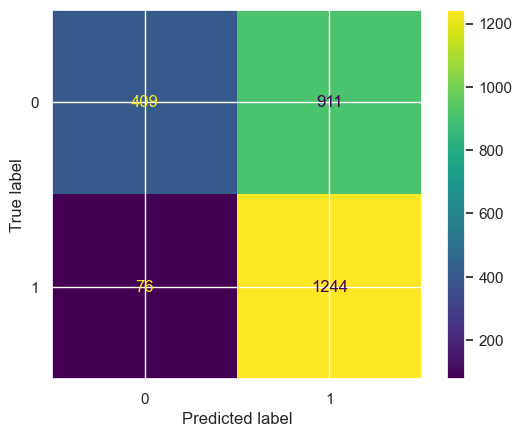

In [39]:
#Training and testing with SMOTE

model = train_test_NaiveBayes(X_train_10,X_test_10)

best parameters: 
{'NaiveBayes__var_smoothing': 1e-05}
f1 score is 0.72 
Precision: 0.58
Recall: 0.96
Accuracy score for Naive Bayes Model: 62.65 %


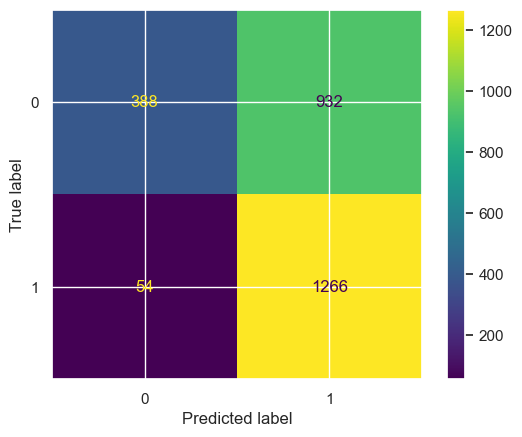

In [40]:
model = train_test_NaiveBayes(X_train_50,X_test_50)

best parameters: 
{'NaiveBayes__var_smoothing': 1e-05}
f1 score is 0.79 
Precision: 0.67
Recall: 0.95
Accuracy score for Naive Bayes Model: 74.28 %


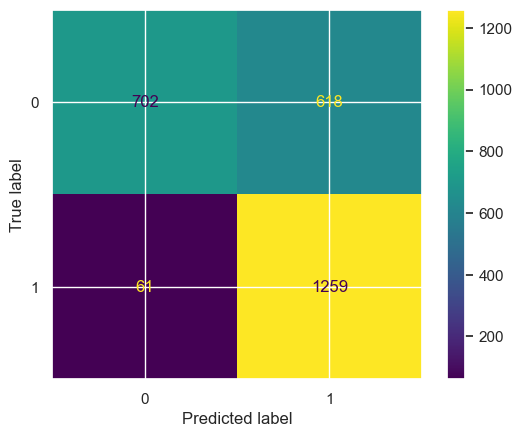

In [41]:
model = train_test_NaiveBayes(X_train_70,X_test_70)

# Now go with Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

def train_test_DecisionTree(x, x_test_):
    """Function finds the optimal hyperparameters of the Decision Tree classifier, plots the confusion matrix of test data, and returns the model"""
    sw_train = compute_sample_weight(class_weight='balanced', y=y_train) 

    steps = [('scaler', StandardScaler()), ('DecisionTree', DecisionTreeClassifier(random_state=42))]
    pipeline = Pipeline(steps)

    grid_param = {'DecisionTree__max_depth': [5, 10, 15, 20, 25],
                  'DecisionTree__min_samples_split': [2, 5, 10, 15, 20],
                  'DecisionTree__min_samples_leaf': [1, 2, 5, 10, 15]}

    f1 = make_scorer(f1_score, average='macro')
    grid = GridSearchCV(pipeline, param_grid=grid_param, cv=5, scoring=f1, verbose=0)
    grid.fit(x, y_train, DecisionTree__sample_weight=sw_train)

    print("best parameters: ")
    print(grid.best_params_)

    model = grid.best_estimator_
    y_pred = model.predict(x_test_)

    print("f1 score is %.2f "%f1_score(y_test, y_pred))
    print("Precision: %.2f" %precision_score(y_test, y_pred))
    print("Recall: %.2f" %recall_score(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for Decision Tree Model: {:.2f} %".format(acc*100))
    plot_confusion_matrix(model, x_test_, y_test, values_format='d')
    mod.append('DT')
    accuracy.append(acc)
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    return model

best parameters: 
{'DecisionTree__max_depth': 15, 'DecisionTree__min_samples_leaf': 1, 'DecisionTree__min_samples_split': 2}
f1 score is 0.92 
Precision: 0.90
Recall: 0.93
Accuracy score for Decision Tree Model: 91.40 %


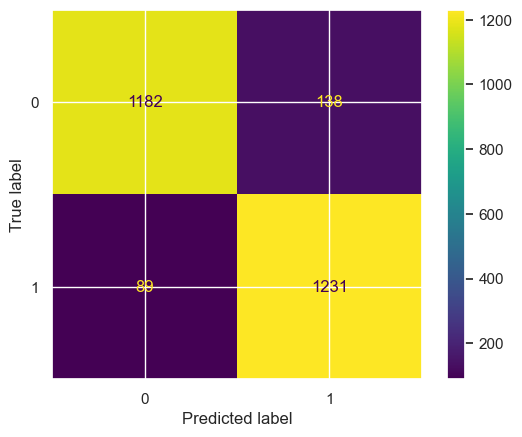

In [43]:
#Training and testing with SMOTE

model = train_test_DecisionTree(X_train_10,X_test_10)

best parameters: 
{'DecisionTree__max_depth': 15, 'DecisionTree__min_samples_leaf': 1, 'DecisionTree__min_samples_split': 2}
f1 score is 0.95 
Precision: 0.93
Recall: 0.97
Accuracy score for Decision Tree Model: 94.43 %


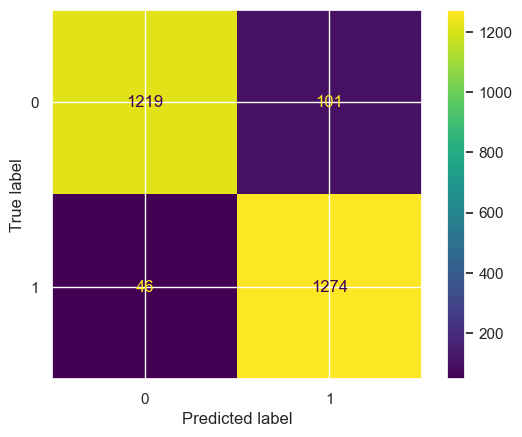

In [44]:
model = train_test_DecisionTree(X_train_50,X_test_50)

best parameters: 
{'DecisionTree__max_depth': 25, 'DecisionTree__min_samples_leaf': 1, 'DecisionTree__min_samples_split': 2}
f1 score is 0.95 
Precision: 0.93
Recall: 0.97
Accuracy score for Decision Tree Model: 94.92 %


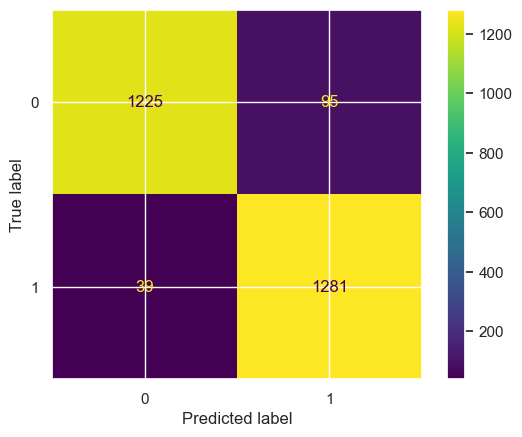

In [45]:
model = train_test_DecisionTree(X_train_70,X_test_70)

# Now go with Ada Boost Algorithm

In [46]:
from sklearn.ensemble import AdaBoostClassifier
def train_test_AdaBoost(x,x_test_):
    """Function finds the optimal hyperparameters of AdaBoost, plots the confusion matrix of test data, returns the model"""
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # stratify adresses the unbalance only in the train test splitting
    
    sw_train = class_weight.compute_sample_weight(class_weight='balanced', y=y_train) # when balanced sw_train = [1.1.1...1]
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('AdaBoost', AdaBoostClassifier())])
    
    # AdaBoost hyperparameters
    param_grid = {
        'AdaBoost__n_estimators': [50, 100, 200],
        'AdaBoost__learning_rate': [0.01, 0.1, 1]
    }
    
    f1 = make_scorer(f1_score, average='macro')
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=f1, verbose=0) # verbose controls the training progression display!
    grid.fit(x, y_train, AdaBoost__sample_weight=sw_train)
    
    print("best parameters: ")
    print(grid.best_params_)
    
    model = grid.best_estimator_
    y_pred = model.predict(x_test_)
    
    print("f1 score is %.2f" % f1_score(y_test, y_pred))
    print("Precision: %.2f" % precision_score(y_test, y_pred))
    print("Recall: %.2f" % recall_score(y_test, y_pred))
    print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
    
    plot_confusion_matrix(model, x_test_, y_test, values_format='d')
    
    mod.append('AdaBoost')
    accuracy.append(accuracy_score(y_test, y_pred))
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    
    return model

best parameters: 
{'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 200}
f1 score is 0.89
Precision: 0.87
Recall: 0.90
Accuracy: 0.89


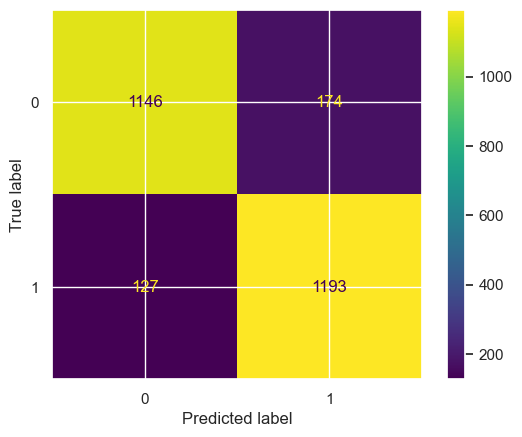

In [47]:
model = train_test_AdaBoost(X_train_10,X_test_10)

best parameters: 
{'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 200}
f1 score is 0.94
Precision: 0.93
Recall: 0.96
Accuracy: 0.94


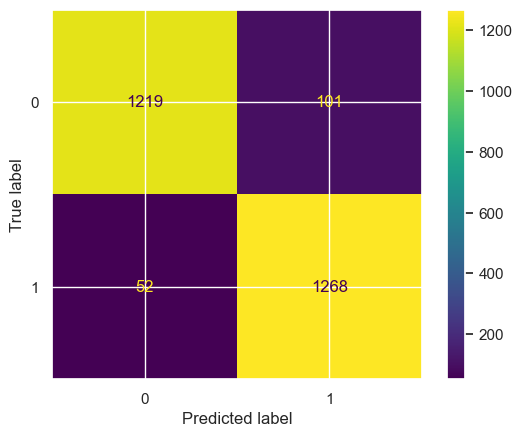

In [48]:
model = train_test_AdaBoost(X_train_50,X_test_50)

best parameters: 
{'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 200}
f1 score is 0.95
Precision: 0.94
Recall: 0.97
Accuracy: 0.95


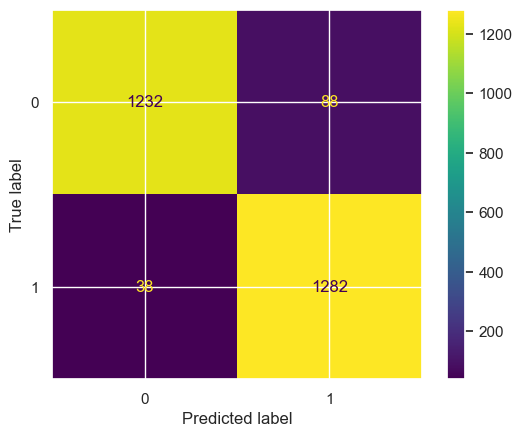

In [49]:
model = train_test_AdaBoost(X_train_70,X_test_70)

# Now go with GradientBoostingClassifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

def train_test_GBT(x, x_test_):
    """Function finds the optimal hyperparameters of the Gradient Boosted Trees classifier, plots the confusion matrix of test data, and returns the model"""
    sw_train = compute_sample_weight(class_weight='balanced', y=y_train) 

    steps = [('scaler', StandardScaler()), ('GBT', GradientBoostingClassifier(random_state=42))]
    pipeline = Pipeline(steps)

    grid_param = {'GBT__n_estimators': [50, 100, 200],
                  'GBT__learning_rate': [0.1, 0.05, 0.01],
                  'GBT__max_depth': [3, 5, 7]}

    f1 = make_scorer(f1_score, average='macro')
    grid = GridSearchCV(pipeline, param_grid=grid_param, cv=5, scoring=f1, verbose=0)
    grid.fit(x, y_train, GBT__sample_weight=sw_train)

    print("best parameters: ")
    print(grid.best_params_)

    model = grid.best_estimator_
    y_pred = model.predict(x_test_)

    print("f1 score is %.2f "%f1_score(y_test, y_pred))
    print("Precision: %.2f" %precision_score(y_test, y_pred))
    print("Recall: %.2f" %recall_score(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for Gradient Boosted Trees Model: {:.2f} %".format(acc*100))
    plot_confusion_matrix(model, x_test_, y_test, values_format='d')
    mod.append('GBT')
    accuracy.append(acc)
    f1_measure.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    return model

In [51]:
model = train_test_GBT(X_train_10,X_test_10)

KeyboardInterrupt: 

In [ ]:
model = train_test_GBT(X_train_50,X_test_50)

In [ ]:
model = train_test_GBT(X_train_70,X_test_70)

In [ ]:
dff = pd.DataFrame({'Classifier': mod, 'Accuracy': accuracy, 'F1-Measure': F1_measure,'Recall': Recall,'Precision':Precision})

In [ ]:
dff

In [ ]:
dff=df2

In [ ]:
# Create a dictionary to map the old Classifier names to the new names

# Add a new column with the SMOTE information
df2['Feature'] = ['_50' if i%3==1 else '_70' if i%3==2 else '_10' for i in range(len(df2))]

# Merge the Classifier and SMOTE columns to get the desired output
df2['Classifier'] = df2['Classifier'] +  df2['Feature']
# Drop the SMOTE column
df2 = df2.drop('Feature', axis=1)
# Print the updated dataframe
df2

# Model Comparison

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Set the index of the dataframe to the Classifier column
df2.set_index('Classifier', inplace=True)

# Plot the bar chart
ax = df2.plot(kind='bar', figsize=(10,6))

# Set the title, x-label, and y-label of the plot
ax.set_title('Classifier Comparison')
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')

# Show the plot
plt.show()